Bibliotecas importadas

In [6]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [7]:
dataSet = keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = dataSet.load_data()

11501568/11490434 [==============================] - 0s 0us/step


Inicialmente los valores de los píxeles están comprendidos entre [0-255]

In [8]:
training_images[4]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [9]:
print(training_labels[4])

9


(28, 28)


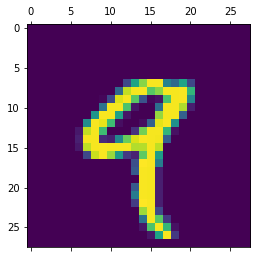

In [10]:
plt.matshow(training_images[4])
dimensions = training_images[4].shape
print(dimensions)

Normalizo los valores

In [11]:
training_images = training_images / 255.0
test_images = test_images / 255.0

In [12]:
training_images[4]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

**Preguntar si existe algún modelo mas interesante para la clasificación de este tipo de imágenes (Quizás una red convolucional que simule el comportamiento de la visión, ¿Conv2D?)**

In [13]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), # 128 capas de neuronas, donde cada neurona se activará si supera cierto umbral, pasando a la siguiente capa
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax) # 10 capas de neuronas, las cuales se activarán ante el mayor valor de un conjunto (mayor probabilidad)
]) 


**Preguntar si existe algún optimizador mas interesante para la clasificación de este tipo de imágenes**

In [14]:
model.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss="sparse_categorical_crossentropy", 
              metrics=["accuracy"]) 

In [15]:
model.fit(training_images, training_labels, epochs=50)

Epoch 1/50
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2589 - accuracy: 0.9251
Epoch 2/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1149 - accuracy: 0.9661
Epoch 3/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0775 - accuracy: 0.9768
Epoch 4/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0576 - accuracy: 0.9821
Epoch 5/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0452 - accuracy: 0.9861
Epoch 6/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0352 - accuracy: 0.9887
Epoch 7/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0280 - accuracy: 0.9914
Epoch 8/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0221 - accuracy: 0.9930
Epoch 9/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0207 - accuracy: 0.9934
Epoch 10/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.015

Evalúo el modelo con el conjunto de pruebas. Obtenemos una precisión del **97.65%**

In [16]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 1ms/step - loss: 0.1501 - accuracy: 0.9797


[0.15008893609046936, 0.9797000288963318]

In [17]:
model.predict(test_images)

array([[1.06218535e-17, 8.14199887e-20, 1.18723494e-15, ...,
        1.00000000e+00, 6.42966373e-18, 5.84951618e-12],
       [9.79805669e-31, 1.80299698e-16, 1.00000000e+00, ...,
        0.00000000e+00, 3.00585729e-23, 0.00000000e+00],
       [1.30934949e-16, 9.99904394e-01, 4.48681398e-10, ...,
        2.45578610e-11, 9.56072763e-05, 1.45340713e-19],
       ...,
       [0.00000000e+00, 7.71288755e-37, 9.70292455e-36, ...,
        6.59398418e-23, 2.62287693e-22, 2.21047641e-17],
       [3.15269895e-36, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 3.19712035e-15, 0.00000000e+00],
       [1.75400474e-29, 0.00000000e+00, 4.35860010e-26, ...,
        8.36830152e-37, 7.69396928e-28, 2.31675554e-38]], dtype=float32)

# EJERCICIO
Dibuja en papel o en paint unos números (por separado como en las muestras de entrenamiento). Pásaselos a tu red entrenada para ver si acierta.


In [28]:
from google.colab import drive
drive.mount('/content/drive')
import cv2 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [87]:
im_one_path = "/content/5colab.png"

In [88]:
im_one = cv2.imread(im_one_path, cv2.IMREAD_GRAYSCALE)

In [89]:
print(im_one.max(), im_one.min(), im_one.shape)

255 60 (196, 201)


In [90]:
im_one = im_one/255.0

In [91]:
print(im_one.max(), im_one.min(), im_one.shape)

1.0 0.23529411764705882 (196, 201)


In [92]:
im_one = cv2.resize(im_one, (28, 28))

In [93]:
print(im_one.max(), im_one.min(), im_one.shape)

1.0 0.23529411764705882 (28, 28)


In [94]:
# Ya podría utilizar la imagen

In [95]:
print(test_images.shape) # Tengo 10000 imagenes de tests, de 28x28 cada una

(10000, 28, 28)


In [96]:
im_one = np.expand_dims(im_one, 0)

In [97]:
print(im_one.shape)

(1, 28, 28)


In [98]:
result = model.predict(im_one)
print(result)

[[0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  1.3136314e-25 0.0000000e+00 1.0000000e+00 0.0000000e+00 0.0000000e+00]]


In [99]:
print(result.argmax())

7


In [100]:
print(test_images[0].max(), test_images[0].min(), test_images[0].shape)

1.0 0.0 (28, 28)


In [101]:
print(im_one.max(), im_one.min(), im_one.shape)

1.0 0.23529411764705882 (1, 28, 28)


In [102]:
im_one = 1.0 - im_one # Debo poner el fondo oscuro para que esté en igualdad de condiciones

In [103]:
print(im_one.max(), im_one.min(), im_one.shape)

0.7647058823529411 0.0 (1, 28, 28)


In [104]:
result = model.predict(im_one)
print(result)

[[9.7778334e-11 8.4424514e-08 1.3302259e-09 1.1543376e-02 3.1058357e-18
  9.8739129e-01 4.2611518e-12 1.5765199e-08 2.6418967e-08 1.0650598e-03]]


In [105]:
print(result.argmax())

5
